In [1]:
# NO CODE
%matplotlib inline
from IPython.display import Image
from IPython.core.display import SVG

# Hierarchisches clustering

In diesem Tutorial werden die Grundlagen der Clusteranalyse beschrieben und die hierarchische Clusteranalyse mit der Ward-Methode in Python umgesetzt.

> Die Clusteranalyse ist ein exploratives Verfahren um Ähnlichkeitsstrukturen in Daten zu erkennen.  

Bei den Untersuchungsobjekten einer Clusteranalyse kann es sich sowohl um Personen, Produkte oder um beliebige andere Einheiten wie Filme, Länder oder Unternehmen handeln. Durch die Anwendung der Clusteranalyse können diese Objekte anhand ihrer Eigenschaftsausprägungen zu Clustern zusammengefasst werden. Dabei soll jedes Cluster in sich möglichst gleichartig (homogen) sein und sich gleichzeitig von den anderen Clustern möglichst stark unterscheiden (heterogen).  

Beispielsweise erfasst der Streaminganbieter Netflix die Sehgewohnheiten seiner Abonnenten und hat auf dieser Grundlage über 2000 Mikro-Cluster, sogenannte "Taste Communities", gebildet ([New York Magazine, 2018](https://www.vulture.com/2018/06/how-netflix-swallowed-tv-industry.html)). Den Mitgliedern der jeweiligen Clustern sollen anhand der jeweiligen Clusterzugehörigkeit möglichst passende Inhalte vorgeschlagen werden. Die Filme können dabei ebenfalls anhand unterschiedlicher Merkmale geclustert und im Anschluss mit aussagekräftigen Bezeichnungen versehen werden ([Netflix, 2017](https://media.netflix.com/de/press-releases/decoding-the-defenders-netflix-unveils-the-gateway-shows-that-lead-to-a-heroic-binge)):

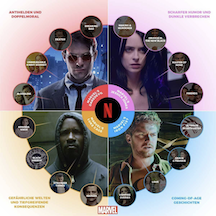

In [2]:
# NO CODE
Image(filename = "img/netflix.png")

## Voraussetzungen

Wichtige Voraussetzungen, die bei der Durchführung der Analyse beachtet werden sollten [(Universität Zürich, 2018)](https://www.methodenberatung.uzh.ch/de/datenanalyse_spss/interdependenz/gruppierung/cluster.html):

- Die Analyse kann für unterschiedliche Datentypen (kategoriale und metrische Daten) genutzt werden.
- Fehlende Werte und Ausreißerwerte sollten vorab beseitigt werden.
- Weisen die verwendeten Variablen große Unterschiede bezüglich ihres Wertebereichs auf (bspw. wenn eine Variable in cm und die andere in km gemessen wurde), so sollten diese auf ein einheitliches Niveau transformiert werden. Üblicherweise wird dafür die z-Transformation genutzt.

Bei der Berechnung der Cluster wird nach bestimmten Regeln entschieden, wie die Objekte zu Clustern zusammengefasst werden. Das Ergebnis dieses Prozesses hängt nicht nur von der Wahl des Clustering-Algorithmus ab, sondern auch davon, wie die Distanz oder Ähnlichkeit zwischen den Objekten bestimmt wird.

Zu Beginn der Clusteranalyse wird daher in Abhängigkeit von den vorliegenden Datentypen ein sogenanntes *Proximitätsmaß* gewählt.

## Proximitätsmaß

Mit Hilfe des Proximitätsmaßes wird die Distanz zwischen den Objekten berechnet. In Abhängigkeit von dem Skalenniveau der Variablen wird eine Distanzfunktion zur Bestimmung des Abstandes (Distanz) zweier Elemente oder eine Ähnlichkeitsfunktion zur Bestimmung der Ähnlichkeit verwendet:

- Bei kategorialen (nominalen und ordinalen) Variablen werden Ähnlichkeitsmaße benutzt.

- Bei metrischen Variablen werden Distanzmaße genutzt.

In diesem Tutorial behandeln wir die Distanzmaße "euklidische Distanz" (auch $L_2$ genannt), "quadrierte euklidische Distanz" und die "L1-Distanz" (auch Manhattan-Metrik, Manhattan-Distanz, Mannheimer Metrik, Taxi- oder Cityblock-Metrik geannt).

### Euklidische Distanz

Mit Hilfe der euklidischen Distanz kann der Abstand zwischen zwei Punkten als gerade Linie in einem Raum berechnet werden ("Luftliniendistanz"). Anders formuliert ist der euklidische Abstand zweier Punkte die mit einem Lineal gemessene Länge einer Strecke, die diese zwei Punkte verbindet. Ein Distanzwert von Null bedeutet dabei, dass die Objekte einen Abstand von Null aufweisen, also identisch sind.

Die Formel für die Berechnung der euklidischen Distanz für $n$ verschiedenen Variablen lautet:

$$d(A,B) = \sqrt{\sum_{i=1}^{n}(A_i - B_i)^2}$$

Die Formel kann in einem zweidimensionalen Koordinatensystem mit den beiden Variablen $X$ und $Y$ (d.h. n = 2) wie folgt visualisiert werden ([Korstanje, 2019](https://towardsdatascience.com/3-distances-that-every-data-scientist-should-know-59d864e5030a)):

<p align="center">
    <img src="https://miro.medium.com/max/1524/1*J2bK-UKhrW1Ill5EyAxXOQ.png" alt="" width="400"/>
</p>

Wie aus dem Punktediagramm entnommen werden kann, gelten für die Punkte A und B: 

- $x_A$ = 70
- $x_B$ = 330
- $y_A$ = 40
- $y_B$ = 228

Da wir in diesem Beispiel nur 2 Variablen vorliegen haben (n = 2), gilt hier ein bekannter Spezialfall der Berechnung des euklidischen Abstandes: der Satz des Pythagoras. Für die Berechnung der euklidischen Distanz werden daher lediglich die (X,Y)-Koordinaten benötigt um mit Hilfe der Formel von Pythagoras die Distanz zu berechnen:

$$d(A,B) = \sqrt{(x_A-x_B)^2 + (y_A-y_B)^2}$$

$$d(A,B) = \sqrt{(70-330)^2 + (40-228)^2}$$

$$d(A,B) = \sqrt{(-260)^2 + (-188)^2}$$

$$d(A,B) = \sqrt{(76600 + 35344) }$$

$$d(A,B) = \sqrt{(112225) }$$

$$d(A,B) = 335$$

### Quadrierte euklidische Distanz

Anstelle der einfachen euklidischen Distanz kann auch die quadrierte euklidische Distanz als Distanzmaß genutzt werden. Dadurch werden größere Abweichungen stärker gewichtet. Die Formel der quadrierten euklidischen Distanz lautet:

$$d^2(A,B) = \sum_{i=1}^{n}(A_i - B_i)^2$$

Für unser Datenbeispiel gilt daher:

$$d^2(A,B) = (x_A-x_B)^2 + (y_A-y_B)^2$$

$$d^2(A,B) = (70-330)^2 + (40-228)^2$$

$$d^2(A,B) = 112225$$

### $L_1$-Distanz

Die $L_1$-Distanz (auch Manhattan-Metrik, Manhattan-Distanz, Mannheimer Metrik, Taxi- oder Cityblock-Metrik) ist eine Metrik, in der die Distanz $d$ zwischen zwei Punkten $A$ und $B$ als die Summe der absoluten Differenzen ihrer Einzelkoordinaten definiert wird. Dies ist insbesondere bei der Berechnung von geografischen Abständen relevant, bei welchen der Abstand zwischen zwei Punkten über vordefinierte Wege (bspw. Straßen in einer Stadt mit einer blockartigen Struktur wie in Manhattan oder Mannheim) zurückgelegt werden muss ([Korstanje, 2019](https://towardsdatascience.com/3-distances-that-every-data-scientist-should-know-59d864e5030a))

<p align="center">
    <img src="https://miro.medium.com/max/1400/1*88uZae0Utf7kavhQFvMqaw.png" alt="" width="400"/>
</p>


Wie aus der Abbildung ersichtlich wird, existieren mehrere Möglichkeiten, den Abstand zwischen den Punkten A und B zu berechnen. Wichtig ist jedoch, dass die "Straßen" nicht verlassen werden dürfen. D.h. es können bspw. zwei Blöcke nach oben (Norden) und dann drei Blöcke nach rechts (Osten) auf der Fahrbahn zurückgelegt werden, um von Punkt A aus Punkt B zu erreichen. Unabhängig von dem gewählten Pfad ist die Distanz aufgrund der blockartigen Struktur immer die gleiche.

Allgemein lautet die Formel für die Berechnung des L1-Abstands wie folgt:

$$d(A,B) = \sum_{i} |A_i - B_i|$$

In unserem Fall gilt:

$$d(A,B) = |x_A - x_B| + |y_A - y_B |$$

$$d(A,B) = |70 - 330| + |40 - 228 |$$

$$d(A,B) = |-260 | + |-188|$$

$$d(A,B) = 260 + 188$$

$$d(A,B) = 448 $$

## Clustering-Algorithmus

Ist das Proximitätsmaß berechnet, so wird anhand eines Clustering-Algorithmus die eigentliche Gruppierung der Daten vorgenommen. In dieser Abbildung sind beispielhaft einige Clustering-Algorithmen aufgeführt ([Universität Zürich,  2018](https://www.methodenberatung.uzh.ch/de/datenanalyse_spss/interdependenz/gruppierung/cluster.html)):  

<p align="center">
    <img src="https://www.methodenberatung.uzh.ch/dam/jcr:ffffffff-81eb-fc79-0000-000008e2c10d/Clus_Abb_04.jpg" alt="Clustering-Algortihmen" width="600"/>
</p>


Bei den hier dargestellten Algorithmen wird zwischen **hierarchischen** und **nicht-hierarchischen** Algorithmen unterschieden. Im Rahmen dieses Tutorials werden ausschließlich hierarchische Algorithmen behandelt. Diese werden weiter in agglomerative und divisive Verfahren unterteilt.

Bei **divisiven** Verfahren wird zunächst ein Cluster gebildet, welches alle Datenpunkte enthält. Dieses wird dann schrittweise in kleinere Cluster zerteilt, bis jeder Fall ein eigenes Cluster bildet. Bei **agglomerativen** Verfahren werden die Datenpunkte zuerst einzeln betrachtet (d.h. jeder Fall ist ein eigenes Cluster) und dann schrittweise zu größeren Clustern zusammengefasst. Die agglomerativen Verfahren werden in Linkage-Methoden und Varianz-Methoden unterteilt.



### Linkage-Methoden

Bei den **Linkage-Methoden** wird in jedem Schritt nach einer bestimmten Logik geprüft, welche Cluster den geringsten Abstand zueinander aufweisen. Diese Cluster werden dann zu einem neuen Cluster fusioniert. Je nach Linkage-Methode wird diese Distanz zwischen den Clustern unterschiedlich bestimmt [(Universität Zürich, 2018)](https://www.methodenberatung.uzh.ch/de/datenanalyse_spss/interdependenz/gruppierung/cluster.html):

- Nächstgelegener Nachbar (engl. "*single linkage*"): Das Minimum aller möglichen Distanzen zwischen den Datenpunkten in Cluster 1 und jenen in Cluster 2 wird betrachtet ([Sigbert,  2011](https://de.wikipedia.org/wiki/Hierarchische_Clusteranalyse#/media/Datei:SingleLinkage.svg)):


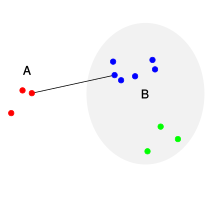

In [3]:
# NO CODE
SVG(filename='img/SingleLinkage.svg')



- Entferntester Nachbar (engl. "*complete linkage*"): Das Maximum aller möglichen Distanzen zwischen den Datenpunkten in Cluster 1 und jenen in Cluster 2 wird betrachtet ([Sigbert,  2011](https://de.wikipedia.org/wiki/Hierarchische_Clusteranalyse#/media/Datei:SingleLinkage.svg)):


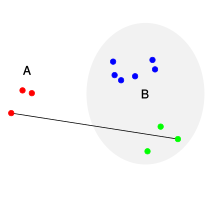

In [4]:
# NO CODE
SVG(filename="img/CompleteLinkage.svg")


- Linkage zwischen Gruppen (engl. "*average linkage*"): Der Mittelwert aller möglichen Distanzen zwischen den Datenpunkten in Cluster 1 und jenen in Cluster 2 wird betrachtet ([Sigbert,  2011](https://de.wikipedia.org/wiki/Hierarchische_Clusteranalyse#/media/Datei:SingleLinkage.svg)):


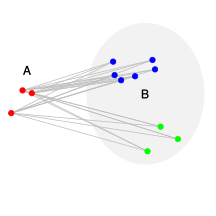

In [5]:
# NO CODE
SVG(filename="img/AverageLinkage.svg")

- Other Linkage: Dies umfasst verschiedene Methoden. Beispielsweise wird die Distanz zwischen dem Median (*Median-Clustering*) von Cluster 1 und dem Median von Cluster 2 betrachtet ([Sigbert,  2011](https://de.wikipedia.org/wiki/Hierarchische_Clusteranalyse#/media/Datei:SingleLinkage.svg)):


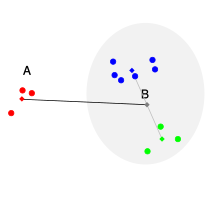

In [6]:
# NO CODE
SVG(filename="img/MedianLinkage.svg")

### Ward-Methode

Neben den Linkage-Methoden exisiteren noch weitere Methoden. Die **Ward-Methode** ist eine beliebte **Varianz-basierte-Methode**. Dabei werden die Cluster, die den kleinsten Zuwachs der totalen Varianz aufweisen, fusioniert. Die Methode ist daher eine Erweiterung der empirischen Varianz einer Variablen auf den multivariaten Fall. 

Formel der empirischen Varianz:  

$$s^2 = \frac{1}{n} \sum_{i=1}^{n}(x_i - \bar{x})^2$$

Formel der totalen Varianz (Streuung eines multivariaten Datensatzes mit $p$ Variablen $X_j$):  

$$T = \frac{1}{n}\sum_{j=1}^{p}  \sum_{i=1}^{n}(x_{ij} - \bar{x_j})^2$$ 

In den Formeln wird ersichtlich, dass $(x_i-\bar{x})^2$ mit der bereits bekannten quadrierten euklidischen Distanz $d^2(x_i,\bar{x})$ übereinstimmt. Es wird also für jedes Cluster die Summe der quadrierten Distanzen der Einzelfälle vom jeweiligen Cluster-Mittelwert berechnet. Diese Werte werden dann über alle Variablen $p$ aufsummiert. Im nächsten Schritt werden jeweils jene zwei Cluster fusioniert, deren Zusammenfügen die geringste Erhöhung der Gesamtsumme der quadrierten Distanzen zur Folge hat.

In dieser Abbildung sind die Ergebnisse der verschiedenen Clustering-Algorithmen für unterschiedliche Datensätze exemplarisch dargestellt (Quelle: [scikit-learn](https://scikit-learn.org/stable/modules/clustering.html)):


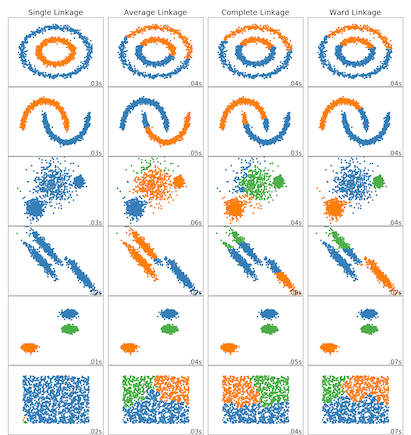

In [7]:
# NO CODE
Image(filename = "img/linkage_comparison.png")


Bei den agglomerativen Verfahren führt das single linkage Verfahren in einigen Fällen zu einer sehr einseitigen Verteilung der Cluster. Die Ward Methode führt dagegen in den meisten Fällen zu einer relativ ausgeglichenen Aufteilung. Im folgenden Beispiel wird daher die Ward-Methode genutzt.


# Python

Für die Durchführung der hierarchischen Clusteranalyse mit der Ward-Methode nutzen wir die Daten des World Happiness Reports aus dem Jahr 2020. Der World Happiness Report ist ein jährlich vom Sustainable Development Solutions Network der Vereinten Nationen veröffentlichter Bericht. Der Bericht enthält Ranglisten zur Lebenszufriedenheit in verschiedenen Ländern der Welt und Datenanalysen aus verschiedenen Perspektiven (siehe [Helliwell et al., 2020](https://worldhappiness.report)).


## Daten

Import der Daten:


In [8]:
import pandas as pd

# CSV Datei einlesen
df = pd.read_csv("https://raw.githubusercontent.com/kirenz/datasets/master/whr_20.csv")

In dieser Analyse nutzen wir die landesspezifischen Informationen zu der Lebenserwartung in Jahren (`healthy_life_expectancy`) und das logarithmierte Bruttoinlandsprodukt pro Einwohner (`logged_gdp_per_capita`):

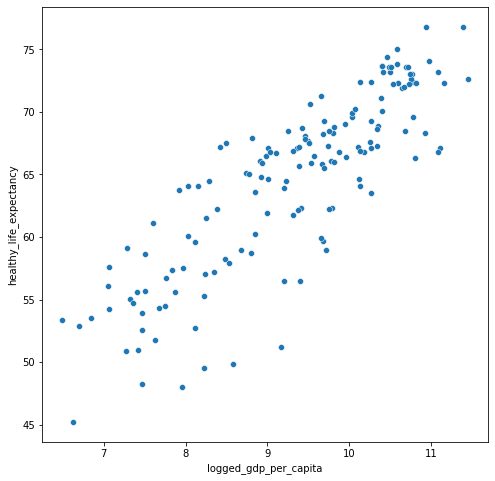

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))

sns.scatterplot(
    data=df, 
    x="logged_gdp_per_capita", y="healthy_life_expectancy",
    palette ="crest"
);

Damit die Vorgehensweise des hierarchischen Clustering-Algorithmus besser nachvollzogen werden kann, ziehen wir zufällig 20 Länder aus dem Datensatz. Um eine Reproduzierbarkeit der Ergebnisse sicherzustellen (d.h., dass immer die gleichen 20 Länder "zufällig" gezogen werden) nutzen wir die Funktion `random_state` mit einer belieben Zahlenfolge (in unserem Beispiel 12).

In [10]:
df = df.sample(n=20, random_state=12)

Darstellung der Länder in einem Punktediagramm:

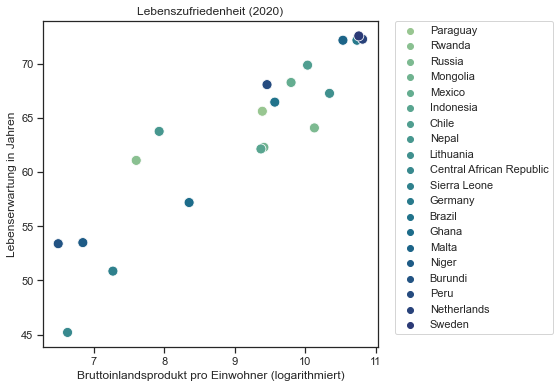

In [11]:
plt.figure(figsize=(6,6))

sns.set_theme(style="ticks", font_scale=1.00)

g = sns.scatterplot(
    data=df, 
    x="logged_gdp_per_capita", y="healthy_life_expectancy", hue="country_name",
    palette="crest", s=100
)

plt.title("Lebenszufriedenheit (2020)")
plt.xlabel("Bruttoinlandsprodukt pro Einwohner (logarithmiert)")
plt.ylabel("Lebenserwartung in Jahren")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

## Datenvorbereitung

Wir erzeugen einen neuen Datensatz `df_cl`, in welchem nur die Variablen enthalten sind, die für die Clusteranalyse genutzt werden sollen. Zusätzlich nutzen wir die Variable `country_name`, um in einem späteren Schritt die Daten sinnvoll beschriften zu können.

In [12]:
df_cl = df[["country_name", "logged_gdp_per_capita", "healthy_life_expectancy"]]

### Fehlende Werte

Wir prüfen, ob in den Daten fehlende Werte vorliegen:

In [13]:
df_cl.isnull().sum(axis=0)

country_name               0
logged_gdp_per_capita      0
healthy_life_expectancy    0
dtype: int64

In diesem Datensatz liegen keine fehlenden Werte vor. Falls dies in einem anderen Projekt jedoch der Fall sein sollte, könnten wir diese fehlenden Werte mit dem Befehl `dropna(axis=0)` entfernen, wobei sich `axis=0` auf die Zeilen des dataframes bezieht:

In [14]:
df_cl = df_cl.dropna(axis=0)

### Standardisierung

Damit die Werte der Variablen in einem einheitlichen Werteintervall vorliegen, nutzen wir für die Standardisierung der Daten die z-Transformation. Mit Hilfe dieser Standardisierung wird der Mittelwert auf 0 und die Standardabweichung der Variablen auf 1 gesetzt. Die Formel dafür lautet:

$$z = \frac{x - \bar{x}}{s}$$ 

* $\bar{x}$: Mittelwert der Daten
* $s$: Standardabweichung der Daten 

Wir führen die Standardisierung für unsere numerischen Variablen mit Hilfe des `StandardScaler()` durch. Dafür erstellen wir zunächst eine Kopie des Datensatzes und nennen diese `df_cl_z`: 

In [15]:
from sklearn.preprocessing import StandardScaler

df_cl_z = df_cl.copy()

features = ["logged_gdp_per_capita","healthy_life_expectancy"]
scaler = StandardScaler()
df_cl_z[features] = scaler.fit_transform(df_cl_z[features])

df_cl_z.head()

,country_name,logged_gdp_per_capita,healthy_life_expectancy
66,Paraguay,0.223408,0.288739
149,Rwanda,-1.034138,-0.304923
72,Russia,0.742543,0.087481
80,Mongolia,0.239009,-0.147308
23,Mexico,0.509934,0.636364


Wie in der Abbildung nachvollzogen werden kann, ändert sich nicht die Position der Länder, sondern lediglich die Einheiten auf der X- und Y-Achse:

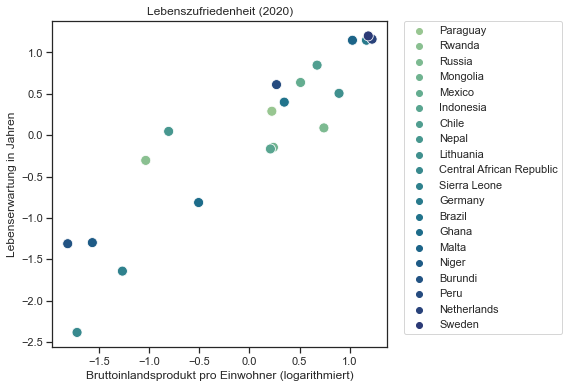

In [16]:
plt.figure(figsize=(6,6))

sns.set_theme(style="ticks", font_scale=1.00)

g = sns.scatterplot(
    data=df_cl_z, 
    x="logged_gdp_per_capita", y="healthy_life_expectancy", hue="country_name",
    palette="crest", s=100
)

plt.title("Lebenszufriedenheit (2020)")
plt.xlabel("Bruttoinlandsprodukt pro Einwohner (logarithmiert)")
plt.ylabel("Lebenserwartung in Jahren")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

Da wir die Variable `country_name` nicht mit in die Berechnung einbeziehen möchten, verwenden wir diese als Index:

In [17]:
df_cl_z = df_cl_z.set_index('country_name')
df_cl_z.index.name = None

df_cl_z.head()

,logged_gdp_per_capita,healthy_life_expectancy
Paraguay,0.223408,0.288739
Rwanda,-1.034138,-0.304923
Russia,0.742543,0.087481
Mongolia,0.239009,-0.147308
Mexico,0.509934,0.636364


## Dendrogramm

Wir beginnen unsere Cluster-Analyse mit der Erstellung eines Dendrogramms, mit dessen Hilfe die Vorgehensweise bei der Erstellung der Cluster dargestellt werden kann. Die Abbbildung ist uns insbesondere bei der Bestimmmung der optimalen Clusteranazahl behilflich, da die Anzahl nicht von dem Cluster-Algorithmus bestimmt wird.  

Das Dendrogramm liest sich in unserem Beispiel von links nach rechts und beschreibt in diese Richtung den Prozess des Clusterings:

-  Die horizontale Achse beschreibt die Heterogenität der Cluster.
-  Auf der linken Seite des Dendrogramms sind alle Länder aufgelistet. 
-  Zunächst entspricht also jedes Land einem einzelnen Cluster, was sich daran zeigt, dass jeder Fall eine eigene horizontale Linie aufweist.
-  Diese Cluster werden in der Folge von links nach rechts sukzessive zu größeren Clustern zusammengefügt. 
-  Dabei werden zu Beginn der agglomerativen Clusterbildung diejenigen Länder fusioniert, welche die geringste Distanz zueinander aufweisen.
-  Die vertikalen Linien zeigen an, dass zwei Cluster fusioniert werden. 
-  In unserem Beispiel sind sich die Länder "Indonesia" und "Monolia" am ähnlichsten.
-  Je größer die horizontale Distanz bis zur Clusterbildung, desto heterogener die entsprechenden Fälle bzw. Cluster. 
-  Am rechten Ende der Abbildung bilden schließlich alle Länder ein gemeinsames Cluster. 

Die **"optimale" Anzahl der Cluster** sollte insbesondere anhand inhalticher Interpretationen in Hinblick einer größtmöglichen Plausibilität der gebildeten Cluster geschehen. Zusätzlich kann der größte (bzw. ein großer) Zuwachs der Heterogenität in dem Dendrogramm als Entscheidungskriterium genutzt werden. Bei unseren Daten entsteht der größte Heterogenitätszuwachs zwischen einer 2-Cluster und 1-Cluster-Lösung. Der Heterogenitätszuwachs zwischen einer 4-Cluster und 2-Cluster-Lösung ist ebenfalls relativ groß. Wir entscheiden uns hier für eine Clusteranzahl von 4, hätten jedoch auch die 2-Cluster-Lösung wählen können. Wie bereits erwähnt existiert bei diesem Verfahren oftmals keine eindeutige "optimale" Lösung, da jeweils auch die Interpretiertbarkeit der Cluster auf Grundlage inhaltlicher Überlegungen eine wichtige Rolle spielt.

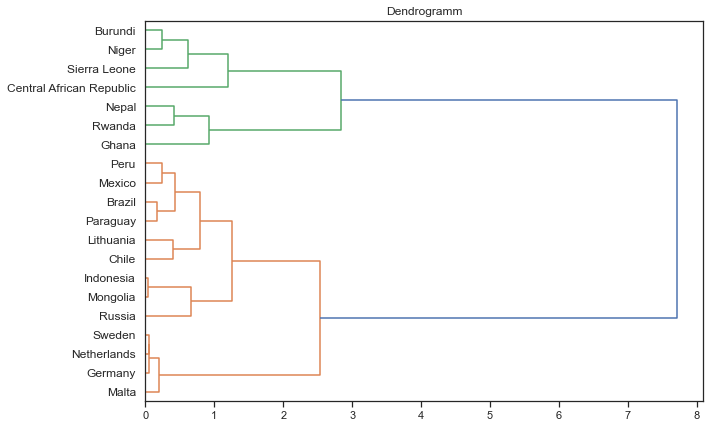

In [18]:
from scipy.cluster import hierarchy

plt.figure(figsize=(10, 7))
plt.title("Dendrogramm")

Z = hierarchy.linkage(df_cl_z, 'ward')
dn = hierarchy.dendrogram(Z, labels=df_cl_z.index, orientation='right')

## Algorithmus

Im nächsten Schritt wird die hierarchische Clusteranalyse angewendet. Dafür nutzen wir die Funktion `AgglomerativeClustering` mit dem Verfahren `ward`, der euklidischen Distanz (`euclidian`) als Proximitätsmaß. Die Anzahl der zu erstellenden Cluster setzen wir hier auf 4. Im Anschluss nutzen wir die Funktion `fit_predict` 

In [19]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(linkage='ward', affinity='euclidean', n_clusters=4)
clustering.fit_predict(df_cl_z)

clustering.labels_

array([0, 2, 0, 0, 0, 0, 0, 2, 0, 1, 1, 3, 0, 2, 3, 1, 1, 0, 3, 3])

Wir übergeben die Ergebnisse in den Datensatz `df_cl` (da wir im Anschluss nicht mit den z-standardisierten Werten arbeiten möchten)

In [20]:
df_cl["cluster"] = clustering.labels_
df_cl.head()

,country_name,logged_gdp_per_capita,healthy_life_expectancy,cluster
66,Paraguay,9.389982,65.639938,0
149,Rwanda,7.600104,61.098846,2
72,Russia,10.128872,64.100456,0
80,Mongolia,9.412187,62.304485,0
23,Mexico,9.797797,68.299026,0


## Visualisierung

In der letzten Abbildung werden die Cluster dargestellt: 

- In der unteren linken Ecke sind Länder mit dem geringsten Bruttoinlandsprodukt pro Einwohner und einer sehr geringen Lebenserwartung aufgeführt. 
- In der oberen rechten Ecke die Länder mit dem höchsten Bruttoinlandsprodukt pro Einwohner und einer sehr hohen Lebenserwartung. 

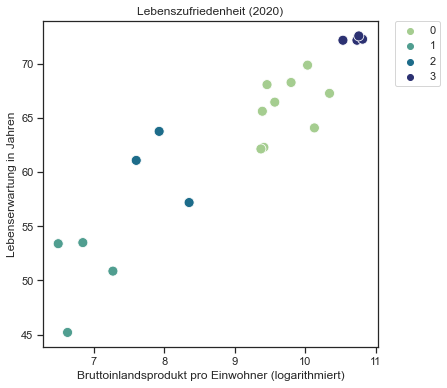

In [21]:
plt.figure(figsize=(6,6))

sns.set_theme(style="ticks", font_scale=1.00)

g = sns.scatterplot(
    data=df_cl, 
    x="logged_gdp_per_capita", y="healthy_life_expectancy", hue="cluster", 
    palette="crest", s=100
)

plt.title("Lebenszufriedenheit (2020)")
plt.xlabel("Bruttoinlandsprodukt pro Einwohner (logarithmiert)")
plt.ylabel("Lebenserwartung in Jahren")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

Alternativ besteht auch die Möglichkeit, die Ländernamen gemeinsamen mit den Clustern als Symbole anzeigen zu lassen:

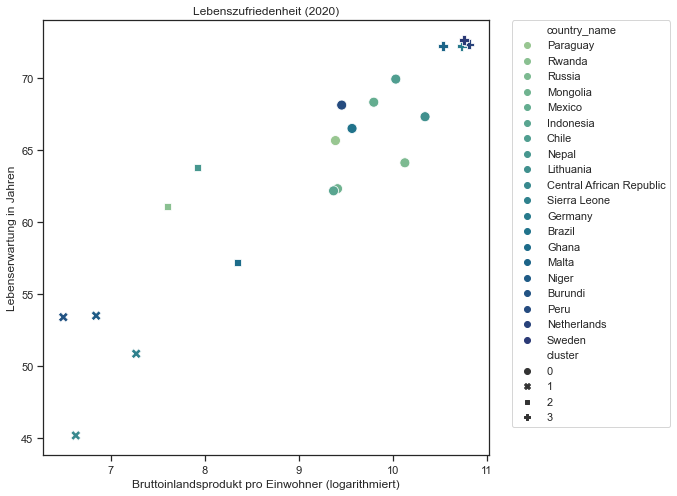

In [22]:
plt.figure(figsize=(8,8))

sns.set_theme(style="ticks", font_scale=1.00)

g = sns.scatterplot(
    data=df_cl, 
    x="logged_gdp_per_capita", y="healthy_life_expectancy", hue="country_name", style="cluster",
    palette="crest", s=100
)

plt.title("Lebenszufriedenheit (2020)")
plt.xlabel("Bruttoinlandsprodukt pro Einwohner (logarithmiert)")
plt.ylabel("Lebenserwartung in Jahren")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);